In [25]:
!pip install scikit-learn pandas matplotlib seaborn

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
from google.colab import files
files.upload()

Saving heart_disease_uci.csv to heart_disease_uci.csv


{'heart_disease_uci.csv': b'id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num\n1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0\n2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2\n3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1\n4,37,Male,Cleveland,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,0,normal,0\n5,41,Female,Cleveland,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,0,normal,0\n6,56,Male,Cleveland,atypical angina,120,236,FALSE,normal,178,FALSE,0.8,upsloping,0,normal,0\n7,62,Female,Cleveland,asymptomatic,140,268,FALSE,lv hypertrophy,160,FALSE,3.6,downsloping,2,normal,3\n8,57,Female,Cleveland,asymptomatic,120,354,FALSE,normal,163,TRUE,0.6,upsloping,0,normal,0\n9,63,Male,Cleveland,asymptomatic,130,254,FALSE,lv hypertrophy,147,FALSE,1.4,flat,1,reversable defect,2

In [29]:
df = pd.read_csv("heart.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [30]:
import pandas as pd

df = pd.read_csv("heart_disease_uci.csv")
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [31]:
df.fillna(df.mean(), inplace=True)

TypeError: can only concatenate str (not "int") to str

In [32]:
for col in df.columns:
    if df[col].dtype == "object":   # categorical
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:   # numeric
        df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-3581600240.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-3581600240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [33]:
df = pd.get_dummies(df, drop_first=True)

In [34]:
print(df.isnull().sum())

id                          0
age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
ca                          0
num                         0
sex_Male                    0
dataset_Hungary             0
dataset_Switzerland         0
dataset_VA Long Beach       0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64


In [35]:
df.fillna(df.mean(), inplace=True)

In [36]:
df = pd.get_dummies(df, drop_first=True)

In [37]:
X = df.drop("target", axis=1)
y = df["target"]

KeyError: "['target'] not found in axis"

In [38]:
df = df.drop("id", axis=1)

In [40]:
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

X = df.drop("num", axis=1)
y = df["num"]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Results:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_true, y_pred))

# Evaluate all
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")


📊 Logistic Regression Results:
Accuracy : 0.842391304347826
Precision: 0.8773584905660378
Recall   : 0.8532110091743119
F1 Score : 0.8651162790697674
ROC-AUC  : 0.8399388379204893

📊 Decision Tree Results:
Accuracy : 0.7717391304347826
Precision: 0.8526315789473684
Recall   : 0.7431192660550459
F1 Score : 0.7941176470588235
ROC-AUC  : 0.7782262996941897

📊 Random Forest Results:
Accuracy : 0.8532608695652174
Precision: 0.91
Recall   : 0.8348623853211009
F1 Score : 0.8708133971291866
ROC-AUC  : 0.8574311926605505


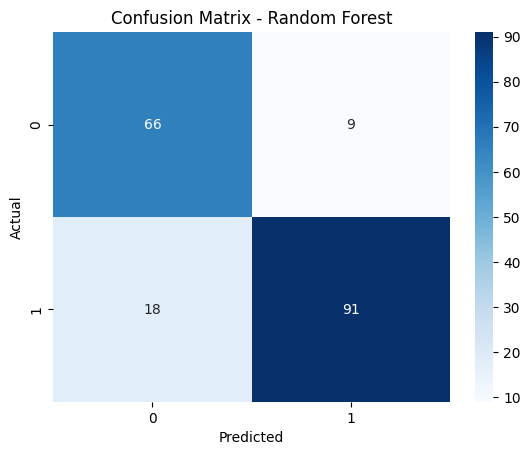

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

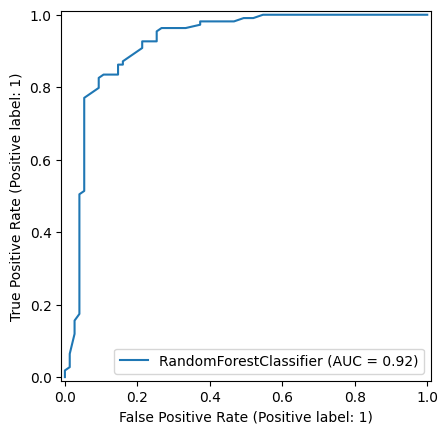

In [46]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 5, 'n_estimators': 300}


In [48]:
import numpy as np

importance = rf.feature_importances_
features = X.columns
for f, score in zip(features, importance):
    print(f, ":", np.round(score, 3))

age : 0.099
trestbps : 0.065
chol : 0.117
fbs : 0.013
thalch : 0.118
exang : 0.082
oldpeak : 0.116
ca : 0.059
sex_Male : 0.047
dataset_Hungary : 0.02
dataset_Switzerland : 0.035
dataset_VA Long Beach : 0.015
cp_atypical angina : 0.068
cp_non-anginal : 0.031
cp_typical angina : 0.016
restecg_normal : 0.016
restecg_st-t abnormality : 0.011
slope_flat : 0.013
slope_upsloping : 0.014
thal_normal : 0.028
thal_reversable defect : 0.017


In [49]:
import joblib
joblib.dump(rf, "disease_model.pkl")

['disease_model.pkl']

In [50]:
# Load model
model = joblib.load("disease_model.pkl")

# Example: pick one test sample
sample = X_test[0].reshape(1, -1)
print("Prediction (1 = Disease, 0 = No Disease):", model.predict(sample))

Prediction (1 = Disease, 0 = No Disease): [0]


In [51]:
# Build results table
results = []

models = {
    "Logistic Regression": (lr, y_pred_lr),
    "Decision Tree": (dt, y_pred_dt),
    "Random Forest": (rf, y_pred_rf)
}

for name, (model, y_pred) in models.items():
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1 Score": round(f1_score(y_test, y_pred), 3),
        "ROC-AUC": round(roc_auc_score(y_test, y_pred), 3)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.842,0.877,0.853,0.865,0.840
1,Decision Tree,0.772,0.853,0.743,0.794,0.778
2,Random Forest,0.853,0.910,0.835,0.871,0.857


In [53]:
model = joblib.load("disease_model.pkl")

In [55]:
sample = X_test[0].reshape(1, -1)
print("Prediction (1 = Disease, 0 = No Disease):", model.predict(sample))

Prediction (1 = Disease, 0 = No Disease): [0]


In [56]:
import numpy as np
custom_patient = np.array([[63, 145, 233, 1, 150, 0, 2.3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]])
custom_patient_scaled = scaler.transform(custom_patient)

# Predict
prediction = model.predict(custom_patient_scaled)
print("Custom Patient Prediction (1 = Disease, 0 = No Disease):", prediction)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 22 features, but StandardScaler is expecting 21 features as input.

In [58]:
print("Number of features:", X.shape[1])
print("Feature names:", list(X.columns))

Number of features: 21
Feature names: ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'sex_Male', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']


In [60]:
custom_patient = np.array([[63, 145, 233, 1, 150, 0, 2.3, 0,
                            1, 0, 0, 0, 0, 1, 0,
                            0, 0, 1, 0, 0, 1]])

In [61]:
custom_patient_scaled = scaler.transform(custom_patient.reshape(1, -1))
prediction = model.predict(custom_patient_scaled)
print("Prediction (1 = Disease, 0 = No Disease):", prediction)

Prediction (1 = Disease, 0 = No Disease): [1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
